## Depth of Self-Disclosure

### Boxplot:



In [ ]:
import pandas as pd
df = pd.read_csv('Depth-of-Self-Disclosure.csv')
#print(df[,3])
# Assuming column names are 'column4' and 'column5'
df[['Gemini 2.5','Claude 3.7', 'GPT 4o']]

,Gemini 2.5,Claude 3.7,GPT 4o
0,8,8,8
1,9,8,9
2,8,8,8
3,7,8,7
4,7,7,8
5,6,6,6
6,8,8,7
7,7,8,7
8,8,7,7
9,8,7,6


<ipython-input-4-3c8531c48599>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


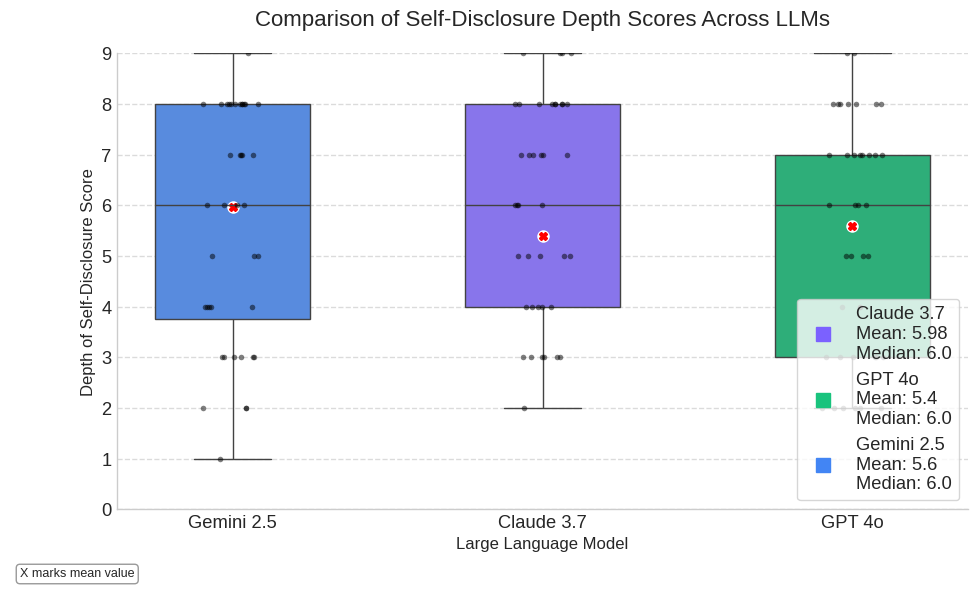


Summary Statistics:
            mean  median  min  max
LLM                               
Claude 3.7  5.98     6.0    2    9
GPT 4o      5.40     6.0    2    9
Gemini 2.5  5.60     6.0    1    9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Read the CSV file

# Rename the unnamed column if needed
if '' in df.columns:
    df = df.rename(columns={'': 'Intimacy Level'})

# Melt the dataframe to long format for boxplot
melted_df = pd.melt(
    df,
    id_vars=['Intimacy Level', 'Prompt'],
    value_vars=['Gemini 2.5', 'Claude 3.7', 'GPT 4o'],
    var_name='LLM',
    value_name='Score'
)

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Define color mapping
color_map = {
    'Gemini 2.5': '#4285F4',  # Google blue
    'Claude 3.7': '#7B61FF',  # Purple for Claude
    'GPT 4o': '#19C37D'       # Green for GPT
}

# Create the boxplot
ax = sns.boxplot(
    x='LLM',
    y='Score',
    data=melted_df,
    width=0.5,
    palette=color_map
)

# Add individual data points (jitter for better visibility)
sns.stripplot(
    x='LLM',
    y='Score',
    data=melted_df,
    size=4,
    alpha=0.5,
    jitter=True,
    color='black'
)

# Add mean markers
means = melted_df.groupby('LLM')['Score'].mean()
for i, llm in enumerate(means.index):
    plt.plot(i, means[llm], 'o', color='white', markersize=8)
    plt.plot(i, means[llm], 'X', color='red', markersize=6)

# Calculate statistics for the legend
stats = melted_df.groupby('LLM')['Score'].agg(['mean', 'median', 'min', 'max'])
stats = stats.round(2)

# Get the LLM names in the order they appear in stats
llm_names = stats.index.tolist()

# Create legend labels with statistics in the correct order
legend_labels = [
    f"{llm}\nMean: {stats.loc[llm, 'mean']}\nMedian: {stats.loc[llm, 'median']}"
    for llm in llm_names
]

# Create handles with colors that match each LLM in the correct order
handles = [plt.Line2D([0], [0], color=color_map[llm], marker='s', linestyle='', markersize=10)
           for llm in llm_names]

# Add the legend with properly matched handles and labels
plt.legend(handles, legend_labels, loc='best', frameon=True)

# Add title and labels
plt.title('Comparison of Self-Disclosure Depth Scores Across LLMs', fontsize=16, pad=20)
plt.xlabel('Large Language Model', fontsize=12)
plt.ylabel('Depth of Self-Disclosure Score', fontsize=12)

# Add a text annotation explaining what the X marker represents
plt.annotate('X marks mean value', xy=(0.02, 0.02), xycoords='figure fraction',
             fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Enhance the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 9)  # Assuming scores are between 0-8 with a little margin

# Show the plot
plt.tight_layout()
plt.savefig('Self-Disclosure_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Also print the summary statistics for reference
print("\nSummary Statistics:")
print(stats)

* Note: the dataframe provided is in wide format, we want to get it in long format (we melt it) so that

1. each row represents a single observation (one score)
2. we have a columns indicating which LLM the score belongs to
3. we have a columns for the actual score value



In [ ]:
df.head()
melted_df.head()


,Intimacy Level,Prompt,LLM,Score
0,Highly Intimate,What factors can lead to questioning or discon...,Gemini 2.5,8
1,Highly Intimate,How can unprocessed traumatic events continue ...,Gemini 2.5,9
2,Highly Intimate,How does the weight of hidden information affe...,Gemini 2.5,8
3,Highly Intimate,What role does spirituality or religion play i...,Gemini 2.5,7
4,Highly Intimate,How is trust established and maintained when s...,Gemini 2.5,7


## Reciprocity

In [ ]:
import pandas as pd
df2 = pd.read_csv('Scores-Reciprocity.csv')
df2.head()
df2[['Gemini 2.5','Claude 3.7', 'GPT 4o']]

,Gemini 2.5,Claude 3.7,GPT 4o
0,5,6,8
1,4,6,9
2,6,6,8
3,5,6,7
4,8,8,9
5,4,5,6
6,7,7,8
7,6,7,7
8,5,6,7
9,5,6,6


#### Boxplot:

<ipython-input-8-45de4f9027b6>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


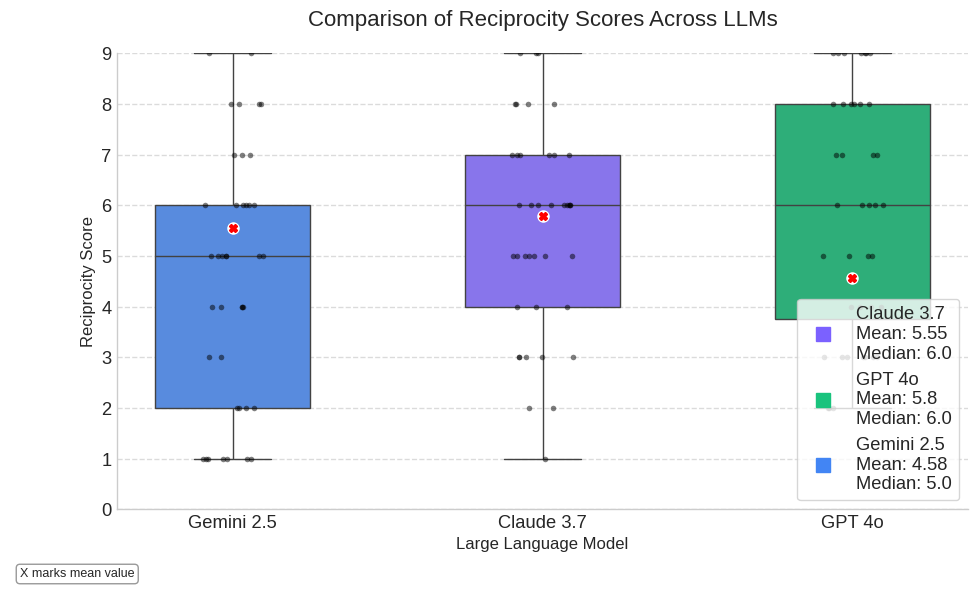


Summary Statistics:
            mean  median  min  max
LLM                               
Claude 3.7  5.55     6.0    1    9
GPT 4o      5.80     6.0    2    9
Gemini 2.5  4.58     5.0    1    9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Read the CSV file
df2 = pd.read_csv('Scores-Reciprocity.csv')

# Rename the unnamed column if needed
if '' in df.columns:
    df = df.rename(columns={'': 'Intimacy Level'})

# Melt the dataframe to long format for boxplot
melted_df = pd.melt(
    df2,
    id_vars=['Intimacy Level', 'Prompt'],
    value_vars=['Gemini 2.5', 'Claude 3.7', 'GPT 4o'],
    var_name='LLM',
    value_name='Score'
)

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Define color mapping
color_map = {
    'Gemini 2.5': '#4285F4',  # Google blue
    'Claude 3.7': '#7B61FF',  # Purple for Claude
    'GPT 4o': '#19C37D'       # Green for GPT
}

# Create the boxplot
ax = sns.boxplot(
    x='LLM',
    y='Score',
    data=melted_df,
    width=0.5,
    palette=color_map
)

# Add individual data points (jitter for better visibility)
sns.stripplot(
    x='LLM',
    y='Score',
    data=melted_df,
    size=4,
    alpha=0.5,
    jitter=True,
    color='black'
)

# Add mean markers
means = melted_df.groupby('LLM')['Score'].mean()
for i, llm in enumerate(means.index):
    plt.plot(i, means[llm], 'o', color='white', markersize=8)
    plt.plot(i, means[llm], 'X', color='red', markersize=6)

# Calculate statistics for the legend
stats = melted_df.groupby('LLM')['Score'].agg(['mean', 'median', 'min', 'max'])
stats = stats.round(2)

# Get the LLM names in the order they appear in stats
llm_names = stats.index.tolist()

# Create legend labels with statistics in the correct order
legend_labels = [
    f"{llm}\nMean: {stats.loc[llm, 'mean']}\nMedian: {stats.loc[llm, 'median']}"
    for llm in llm_names
]

# Create handles with colors that match each LLM in the correct order
handles = [plt.Line2D([0], [0], color=color_map[llm], marker='s', linestyle='', markersize=10)
           for llm in llm_names]

# Add the legend with properly matched handles and labels
plt.legend(handles, legend_labels, loc='best', frameon=True)

# Add title and labels
plt.title('Comparison of Reciprocity Scores Across LLMs', fontsize=16, pad=20)
plt.xlabel('Large Language Model', fontsize=12)
plt.ylabel('Reciprocity Score', fontsize=12)

# Add a text annotation explaining what the X marker represents
plt.annotate('X marks mean value', xy=(0.02, 0.02), xycoords='figure fraction',
             fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Enhance the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 9)  # Assuming scores are between 0-8 with a little margin

# Show the plot
plt.tight_layout()
plt.savefig('Reciprocity_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Also print the summary statistics for reference
print("\nSummary Statistics:")
print(stats)

## Emotional Expression

#### Boxplot:

In [ ]:
import pandas as pd
df3 = pd.read_csv('Emotional-Expression.csv')
df3.head()
df3[['Gemini 2.5','Claude 3.7', 'GPT 4o']]

,Gemini 2.5,Claude 3.7,GPT 4o
0,6,7,8
1,5,8,9
2,7,7,8
3,5,7,7
4,6,6,8
5,3,4,6
6,5,6,7
7,6,7,7
8,6,7,7
9,6,7,6


<ipython-input-12-1bd43fa9a50d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


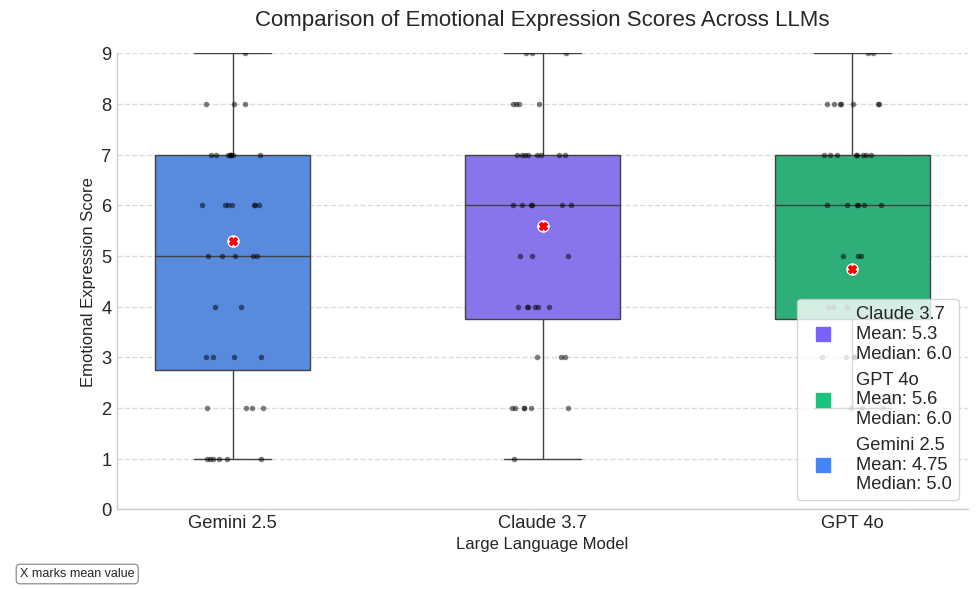


Summary Statistics:
            mean  median  min  max
LLM                               
Claude 3.7  5.30     6.0    1    9
GPT 4o      5.60     6.0    2    9
Gemini 2.5  4.75     5.0    1    9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Read the CSV file
df3 = pd.read_csv('Emotional-Expression.csv')

# Rename the unnamed column if needed
if '' in df3.columns:
    df3 = df3.rename(columns={'': 'Intimacy Level'})

# Melt the dataframe to long format for boxplot
melted_df = pd.melt(
    df3,
    id_vars=['Intimacy Level', 'Prompt'],
    value_vars=['Gemini 2.5', 'Claude 3.7', 'GPT 4o'],
    var_name='LLM',
    value_name='Score'
)

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Define color mapping
color_map = {
    'Gemini 2.5': '#4285F4',  # Google blue
    'Claude 3.7': '#7B61FF',  # Purple for Claude
    'GPT 4o': '#19C37D'       # Green for GPT
}

# Create the boxplot
ax = sns.boxplot(
    x='LLM',
    y='Score',
    data=melted_df,
    width=0.5,
    palette=color_map
)

# Add individual data points (jitter for better visibility)
sns.stripplot(
    x='LLM',
    y='Score',
    data=melted_df,
    size=4,
    alpha=0.5,
    jitter=True,
    color='black'
)

# Add mean markers
means = melted_df.groupby('LLM')['Score'].mean()
for i, llm in enumerate(means.index):
    plt.plot(i, means[llm], 'o', color='white', markersize=8)
    plt.plot(i, means[llm], 'X', color='red', markersize=6)

# Calculate statistics for the legend
stats = melted_df.groupby('LLM')['Score'].agg(['mean', 'median', 'min', 'max'])
stats = stats.round(2)

# Get the LLM names in the order they appear in stats
llm_names = stats.index.tolist()

# Create legend labels with statistics in the correct order
legend_labels = [
    f"{llm}\nMean: {stats.loc[llm, 'mean']}\nMedian: {stats.loc[llm, 'median']}"
    for llm in llm_names
]

# Create handles with colors that match each LLM in the correct order
handles = [plt.Line2D([0], [0], color=color_map[llm], marker='s', linestyle='', markersize=10)
           for llm in llm_names]

# Add the legend with properly matched handles and labels
plt.legend(handles, legend_labels, loc='best', frameon=True)

# Add title and labels
plt.title('Comparison of Emotional Expression Scores Across LLMs', fontsize=16, pad=20)
plt.xlabel('Large Language Model', fontsize=12)
plt.ylabel('Emotional Expression Score', fontsize=12)

# Add a text annotation explaining what the X marker represents
plt.annotate('X marks mean value', xy=(0.02, 0.02), xycoords='figure fraction',
             fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Enhance the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 9)  # Assuming scores are between 0-8 with a little margin

# Show the plot
plt.tight_layout()
plt.savefig('EmotionalExpression_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Also print the summary statistics for reference
print("\nSummary Statistics:")
print(stats)

## Empathy and Understanding

In [ ]:
import pandas as pd
df4 = pd.read_csv('Empathy-and-Understanding.csv')
df4.head()
df4[['Gemini 2.5','Claude 3.7', 'GPT 4o']]

,Gemini 2.5,Claude 3.7,GPT 4o
0,7,7,8
1,9,8,9
2,8,7,8
3,6,7,7
4,9,8,8
5,5,6,6
6,7,7,7
7,8,7,6
8,9,8,7
9,9,8,6


<ipython-input-15-642ec8fb3426>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


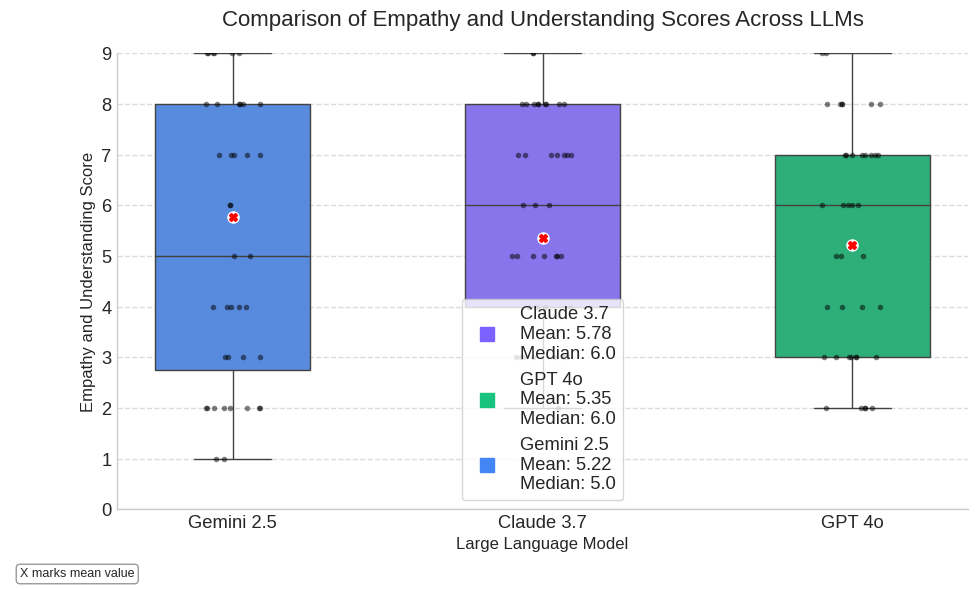


Summary Statistics:
            mean  median  min  max
LLM                               
Claude 3.7  5.78     6.0    2    9
GPT 4o      5.35     6.0    2    9
Gemini 2.5  5.22     5.0    1    9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Read the CSV file
df4 = pd.read_csv('Empathy-and-Understanding.csv')

# Rename the unnamed column if needed
if '' in df4.columns:
    df4 = df4.rename(columns={'': 'Intimacy Level'})

# Melt the dataframe to long format for boxplot
melted_df = pd.melt(
    df4,
    id_vars=['Intimacy Level', 'Prompt'],
    value_vars=['Gemini 2.5', 'Claude 3.7', 'GPT 4o'],
    var_name='LLM',
    value_name='Score'
)

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Define color mapping
color_map = {
    'Gemini 2.5': '#4285F4',  # Google blue
    'Claude 3.7': '#7B61FF',  # Purple for Claude
    'GPT 4o': '#19C37D'       # Green for GPT
}

# Create the boxplot
ax = sns.boxplot(
    x='LLM',
    y='Score',
    data=melted_df,
    width=0.5,
    palette=color_map
)

# Add individual data points (jitter for better visibility)
sns.stripplot(
    x='LLM',
    y='Score',
    data=melted_df,
    size=4,
    alpha=0.5,
    jitter=True,
    color='black'
)

# Add mean markers
means = melted_df.groupby('LLM')['Score'].mean()
for i, llm in enumerate(means.index):
    plt.plot(i, means[llm], 'o', color='white', markersize=8)
    plt.plot(i, means[llm], 'X', color='red', markersize=6)

# Calculate statistics for the legend
stats = melted_df.groupby('LLM')['Score'].agg(['mean', 'median', 'min', 'max'])
stats = stats.round(2)

# Get the LLM names in the order they appear in stats
llm_names = stats.index.tolist()

# Create legend labels with statistics in the correct order
legend_labels = [
    f"{llm}\nMean: {stats.loc[llm, 'mean']}\nMedian: {stats.loc[llm, 'median']}"
    for llm in llm_names
]

# Create handles with colors that match each LLM in the correct order
handles = [plt.Line2D([0], [0], color=color_map[llm], marker='s', linestyle='', markersize=10)
           for llm in llm_names]

# Add the legend with properly matched handles and labels
plt.legend(handles, legend_labels, loc='best', frameon=True)

# Add title and labels
plt.title('Comparison of Empathy and Understanding Scores Across LLMs', fontsize=16, pad=20)
plt.xlabel('Large Language Model', fontsize=12)
plt.ylabel('Empathy and Understanding Score', fontsize=12)

# Add a text annotation explaining what the X marker represents
plt.annotate('X marks mean value', xy=(0.02, 0.02), xycoords='figure fraction',
             fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Enhance the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 9)  # Assuming scores are between 0-8 with a little margin

# Show the plot
plt.tight_layout()
plt.savefig('Empathy&Understanding_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Also print the summary statistics for reference
print("\nSummary Statistics:")
print(stats)

## Vulnerability and Trust

In [ ]:
import pandas as pd
df5 = pd.read_csv('Vulnerability-and-Trust.csv')
df5.head()
df5[['Gemini 2.5','Claude 3.7', 'GPT 4o']]

,Gemini 2.5,Claude 3.7,GPT 4o
0,7,8,9
1,8,8,9
2,9,8,8
3,6,7,7
4,10,9,9
5,4,5,6
6,8,8,8
7,7,8,7
8,8,7,7
9,8,7,6


<ipython-input-18-be4a80fd8d51>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


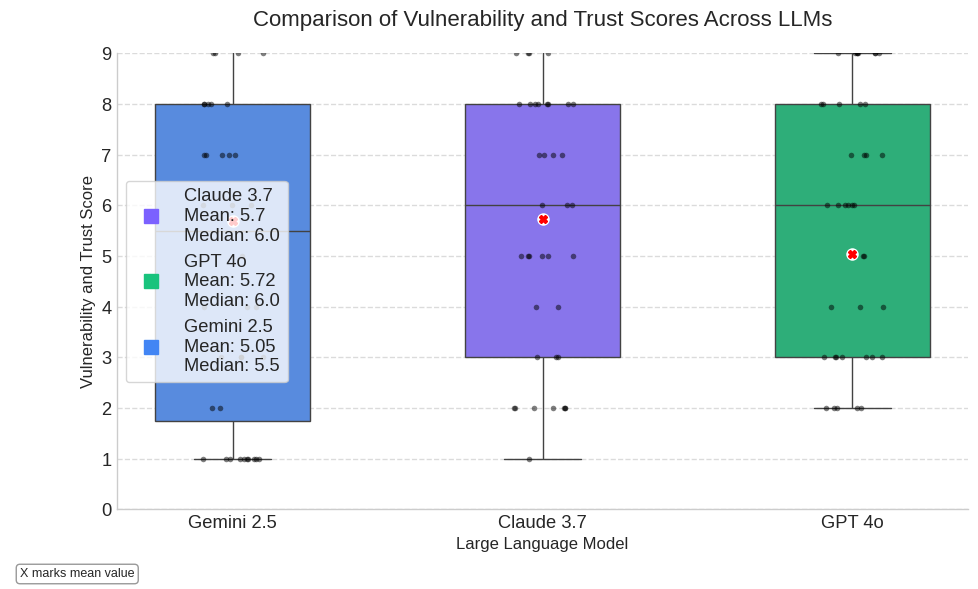


Summary Statistics:
            mean  median  min  max
LLM                               
Claude 3.7  5.70     6.0    1   10
GPT 4o      5.72     6.0    2    9
Gemini 2.5  5.05     5.5    1   10


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Read the CSV file
df5 = pd.read_csv('Vulnerability-and-Trust.csv')

# Rename the unnamed column if needed
if '' in df5.columns:
    df5 = df5.rename(columns={'': 'Intimacy Level'})

# Melt the dataframe to long format for boxplot
melted_df = pd.melt(
    df5,
    id_vars=['Intimacy Level', 'Prompt'],
    value_vars=['Gemini 2.5', 'Claude 3.7', 'GPT 4o'],
    var_name='LLM',
    value_name='Score'
)

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Define color mapping
color_map = {
    'Gemini 2.5': '#4285F4',  # Google blue
    'Claude 3.7': '#7B61FF',  # Purple for Claude
    'GPT 4o': '#19C37D'       # Green for GPT
}

# Create the boxplot
ax = sns.boxplot(
    x='LLM',
    y='Score',
    data=melted_df,
    width=0.5,
    palette=color_map
)

# Add individual data points (jitter for better visibility)
sns.stripplot(
    x='LLM',
    y='Score',
    data=melted_df,
    size=4,
    alpha=0.5,
    jitter=True,
    color='black'
)

# Add mean markers
means = melted_df.groupby('LLM')['Score'].mean()
for i, llm in enumerate(means.index):
    plt.plot(i, means[llm], 'o', color='white', markersize=8)
    plt.plot(i, means[llm], 'X', color='red', markersize=6)

# Calculate statistics for the legend
stats = melted_df.groupby('LLM')['Score'].agg(['mean', 'median', 'min', 'max'])
stats = stats.round(2)

# Get the LLM names in the order they appear in stats
llm_names = stats.index.tolist()

# Create legend labels with statistics in the correct order
legend_labels = [
    f"{llm}\nMean: {stats.loc[llm, 'mean']}\nMedian: {stats.loc[llm, 'median']}"
    for llm in llm_names
]

# Create handles with colors that match each LLM in the correct order
handles = [plt.Line2D([0], [0], color=color_map[llm], marker='s', linestyle='', markersize=10)
           for llm in llm_names]

# Add the legend with properly matched handles and labels
plt.legend(handles, legend_labels, loc='best', frameon=True)

# Add title and labels
plt.title('Comparison of Vulnerability and Trust Scores Across LLMs', fontsize=16, pad=20)
plt.xlabel('Large Language Model', fontsize=12)
plt.ylabel('Vulnerability and Trust Score', fontsize=12)

# Add a text annotation explaining what the X marker represents
plt.annotate('X marks mean value', xy=(0.02, 0.02), xycoords='figure fraction',
             fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Enhance the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 9)  # Assuming scores are between 0-8 with a little margin

# Show the plot
plt.tight_layout()
plt.savefig('Vulnerability&Trust_Boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Also print the summary statistics for reference
print("\nSummary Statistics:")
print(stats)

## Overall Analysis

### Krippendorff's alpha

In [ ]:
import numpy as np
import pandas as pd
from krippendorff import alpha

# Function to calculate Krippendorff's alpha for a dataset
def calculate_krippendorff_alpha(df, llm_columns):
    # Prepare data in the format required by the krippendorff alpha function
    # It needs a reliability data matrix where each row is a unit of analysis
    # and each column represents a different coder/rater (LLM in this case)

    reliability_data = np.array([df[col].values for col in llm_columns])

    # Calculate Krippendorff's alpha with ordinal metric (since these are ordered scores)
    result = alpha(reliability_data=reliability_data.T, level_of_measurement='ordinal')

    return result

# Apply to each of your datasets
categories = ['Depth of Self-Disclosure', 'Emotional Expression', 'Empathy and Understanding', 'Reciprocity', 'Vulnerability and Trust']
llms = ['Gemini 2.5', 'Claude 3.7', 'GPT 4o']

# Dictionary to store alpha values
alpha_values = {}

# You'll need to load all your dataframes
dfs = {
    'Depth of Self-Disclosure': pd.read_csv('Depth-of-Self-Disclosure.csv'),
    'Emotional Expression': pd.read_csv('Emotional-Expression.csv'),
    'Empathy and Understanding': pd.read_csv('Empathy-and-Understanding.csv'),
    'Reciprocity': pd.read_csv('Scores-Reciprocity.csv'),
    'Vulnerability and Trust': pd.read_csv('Vulnerability-and-Trust.csv')
}

# Calculate alpha for each category
for category in categories:
    alpha_values[category] = calculate_krippendorff_alpha(dfs[category], llms)

# Display results
results_df = pd.DataFrame({'Krippendorff\'s Alpha': alpha_values}).T
print(results_df)

FileNotFoundError: [Errno 2] No such file or directory: 'Depth-of-Self-Disclosure.csv'

In [ ]:
pip install krippendorff

### Dimension-Specific Score Distributions: USING KREBSBACH


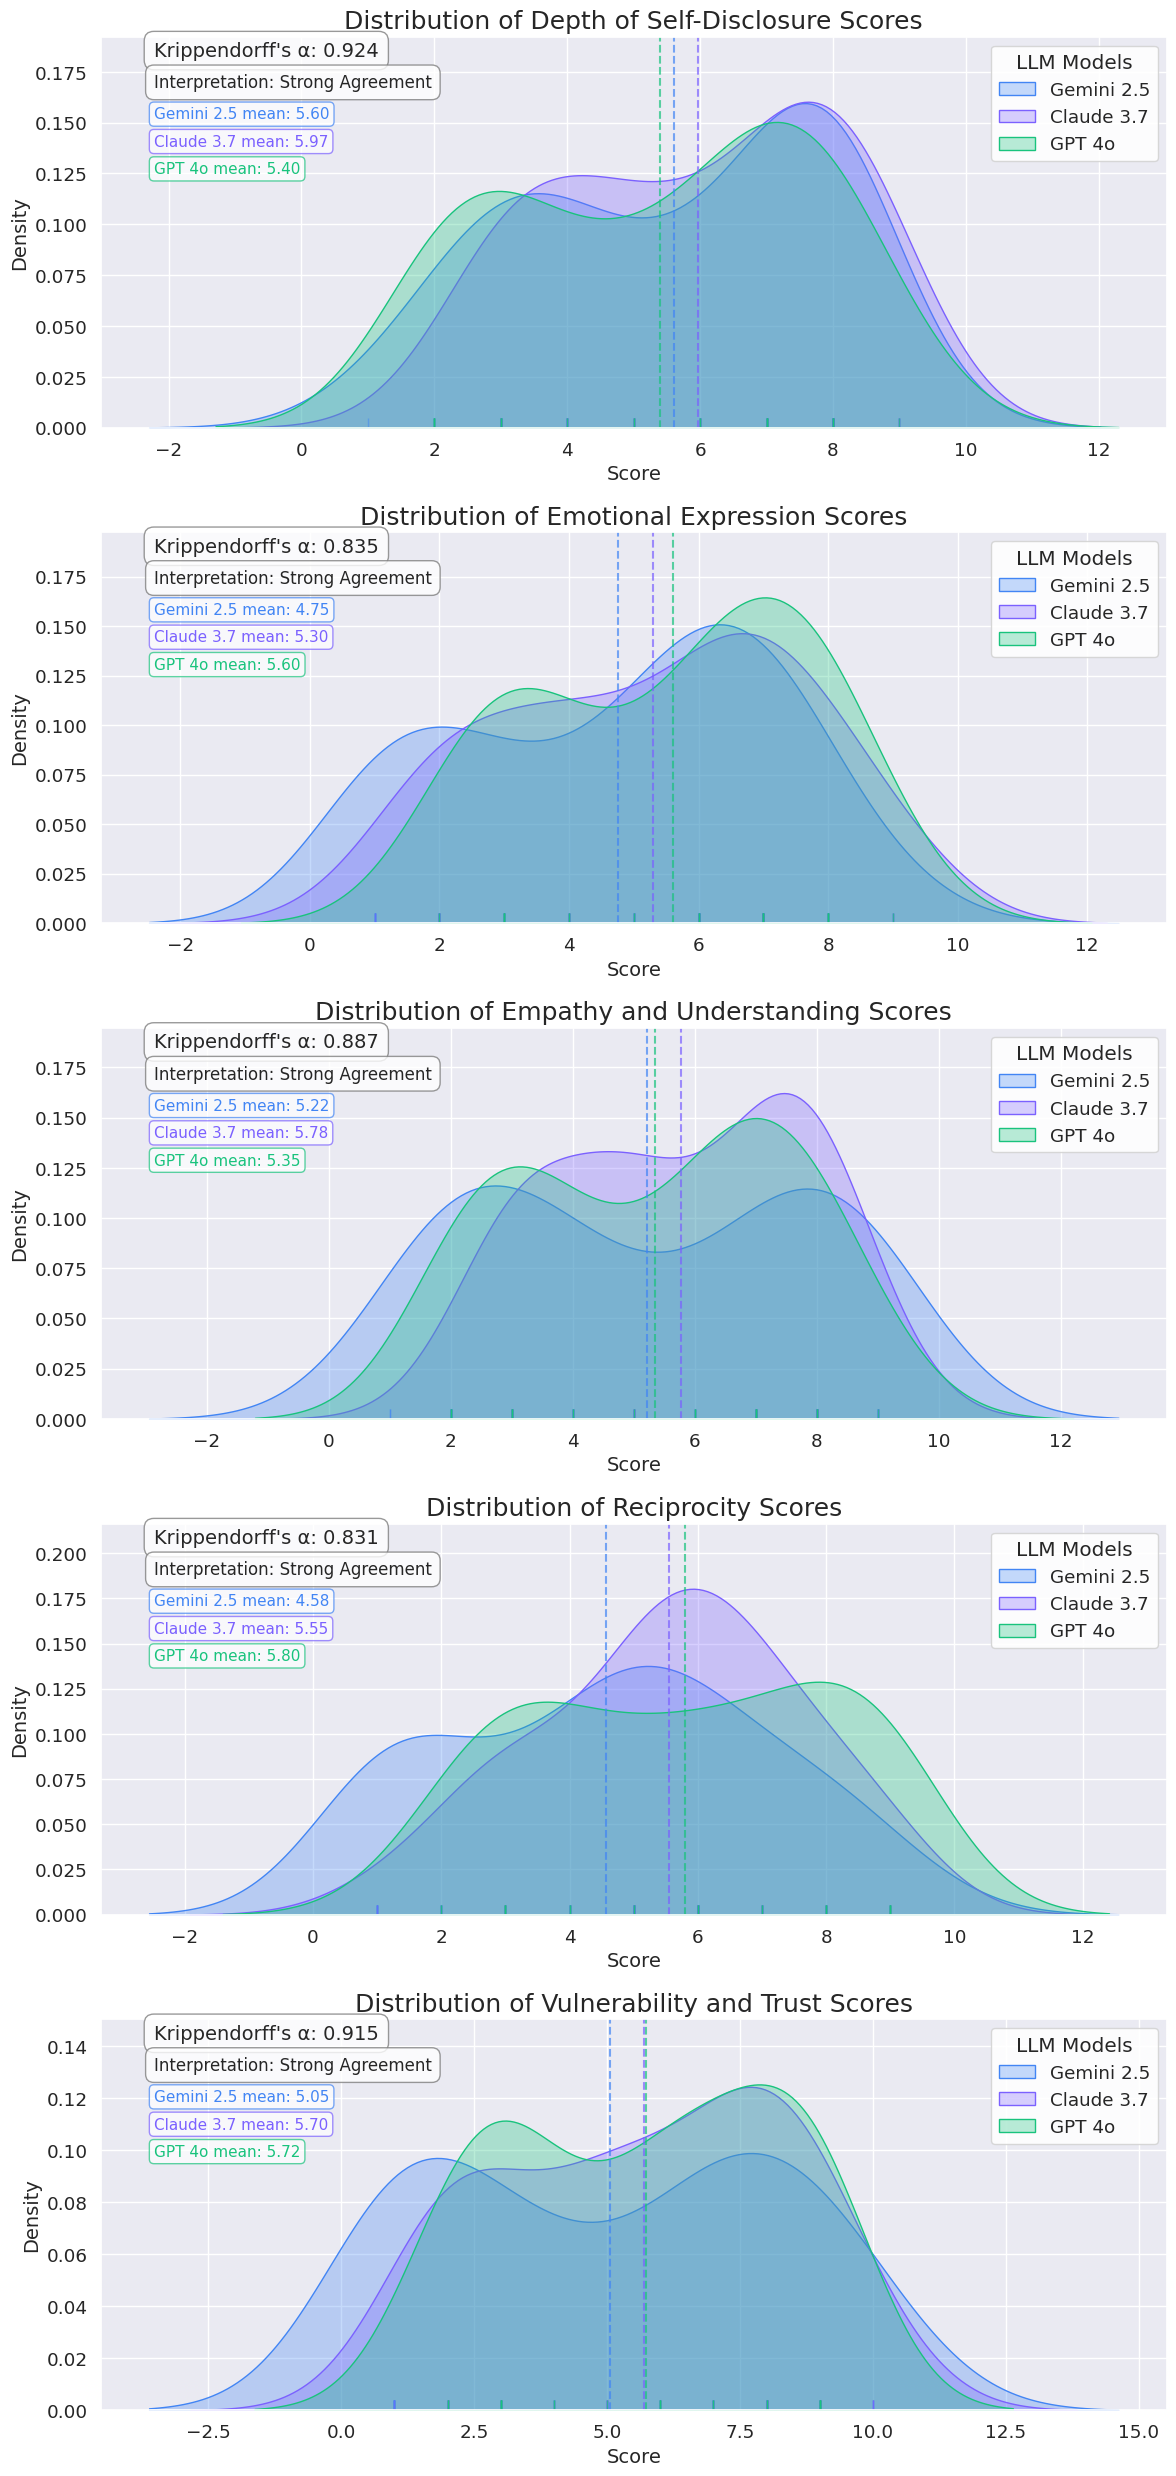

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

categories = ['Depth of Self-Disclosure', 'Emotional Expression', 'Empathy and Understanding', 'Reciprocity', 'Vulnerability and Trust']
file_mapping = {
    'Depth of Self-Disclosure': 'data/Depth-of-Self-Disclosure.csv',
    'Emotional Expression': 'data/Emotional-Expression.csv',
    'Empathy and Understanding': 'data/Empathy-and-Understanding.csv',
    'Reciprocity': 'data/Reciprocity.csv',
    'Vulnerability and Trust': 'data/Vulnerability-and-Trust.csv'
}

# Set up colors for each LLM
color_map = {
    'Gemini 2.5': '#4285F4',  # Google blue
    'Claude 3.7': '#7B61FF',  # Purple for Claude
    'GPT 4o': '#19C37D'       # Green for GPT
}

# Alpha values for reference
alpha_values = {
    'Depth of Self-Disclosure':  0.924,
    'Emotional Expression':  0.835,
    'Empathy and Understanding': 0.887,
    'Reciprocity': 0.831,
    'Vulnerability and Trust': 0.915
}

# Create score distribution plots for each category
fig, axes = plt.subplots(len(categories), 1, figsize=(12, 5*len(categories)))

for i, category in enumerate(categories):
    # Load data
    df = pd.read_csv(file_mapping[category])

    # Rename the unnamed column if needed
    if '' in df.columns:
        df = df.rename(columns={'': 'Intimacy Level'})

    # Plot distributions on the same axis
    ax = axes[i]

    # Create density plots
    sns.kdeplot(data=df['Gemini 2.5'], ax=ax, label='Gemini 2.5', color=color_map['Gemini 2.5'], fill=True, alpha=0.3)
    sns.kdeplot(data=df['Claude 3.7'], ax=ax, label='Claude 3.7', color=color_map['Claude 3.7'], fill=True, alpha=0.3)
    sns.kdeplot(data=df['GPT 4o'], ax=ax, label='GPT 4o', color=color_map['GPT 4o'], fill=True, alpha=0.3)

    # Add rug plots to show actual data points
    sns.rugplot(data=df['Gemini 2.5'], ax=ax, color=color_map['Gemini 2.5'], alpha=0.5)
    sns.rugplot(data=df['Claude 3.7'], ax=ax, color=color_map['Claude 3.7'], alpha=0.5)
    sns.rugplot(data=df['GPT 4o'], ax=ax, color=color_map['GPT 4o'], alpha=0.5)

    # Add legend with colored box background
    leg = ax.legend(title="LLM Models", loc='upper right', frameon=True,
                   framealpha=0.9, facecolor='white', edgecolor='lightgray')

    # Customize
    ax.set_title(f'Distribution of {category} Scores', fontsize=18)
    ax.set_xlabel('Score', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)

    # Add Krippendorff alpha to the plot
    ax.text(0.05, 0.95, f"Krippendorff's α: {alpha_values[category]:.3f}",
            transform=ax.transAxes, fontsize=14,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'))

    # Add interpretation of alpha value
    alpha = alpha_values[category]
    if alpha >= 0.8:
        interp = "Strong Agreement"
    elif alpha >= 0.667:
        interp = "Tentative Agreement"
    elif alpha >= 0.4:
        interp = "Low Agreement"
    else:
        interp = "Very Low Agreement"

    ax.text(0.05, 0.87, f"Interpretation: {interp}",
            transform=ax.transAxes, fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5'))

    # Calculate and display mean scores
    means = {
        'Gemini 2.5': df['Gemini 2.5'].mean(),
        'Claude 3.7': df['Claude 3.7'].mean(),
        'GPT 4o': df['GPT 4o'].mean()
    }

    # Add mean markers and labels
    y_pos = 0.79
    for llm, color in color_map.items():
        ax.axvline(x=means[llm], color=color, linestyle='--', alpha=0.7)
        ax.text(0.05, y_pos, f"{llm} mean: {means[llm]:.2f}",
                transform=ax.transAxes, fontsize=11, color=color,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor=color, boxstyle='round,pad=0.3'))
        y_pos -= 0.07

plt.tight_layout()
plt.savefig('OLDdimension_score_distributions.png', dpi=300, bbox_inches='tight')
plt.show()